In [115]:
# Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
# Clean version of House of Rep. with Dems=0 and Reps=1

dfHOR = pd.read_csv('cleanHOR.csv', index_col='year')
dfHOR.head()

,HOR
year,
1980,0
1981,0
1982,0
1983,0
1984,0


In [117]:
# 30 year Treasury bond rate

dfTBond = pd.read_csv('clean_TbondRate.csv', index_col='year').groupby('year').mean()
dfTBond.head()

,TBondvalue
year,
1980,11.272320
1981,13.445863
1982,12.762771
1983,11.175480
1984,12.409157


In [118]:
# Presidential party with Dems=0, Reps=1

dfPresident = pd.read_csv('clean_president.csv', index_col='year')
dfPresident.head()

,president,party
year,,
1980,Jimmy Carter,0
1981,Ronald Reagan,1
1982,Ronald Reagan,1
1983,Ronald Reagan,1
1984,Ronald Reagan,1


In [119]:
# Alcohol consumption in gallons per capita

dfAlcohol = pd.read_csv('cleanAlcohol.csv', index_col='year')
dfAlcohol.head()

,Beer,Wine,Spirits,All_beverages_in_Gallons
year,,,,
1980,1.37,0.34,1.04,2.75
1981,1.39,0.35,1.02,2.76
1982,1.38,0.36,0.98,2.72
1983,1.37,0.36,0.96,2.69
1984,1.35,0.37,0.94,2.65


In [120]:
# Senate with Dems=0, Reps=1

dfSenate = pd.read_csv('Senate.csv', index_col='year')
dfSenate.head()

,Senate
year,
1980,0
1981,1
1982,1
1983,1
1984,1


In [121]:
# Bread price avg and adjusted to real GDP

dfBread = pd.read_csv('Bread_prices.csv', index_col='year')
dfBread = dfBread[['AvgCost','RealGDP']]
dfBread.head()

,AvgCost,RealGDP
year,,
1980,0.509,1.160423
1981,0.525,1.095582
1982,0.532,1.045335
1983,0.542,1.023424
1984,0.541,0.987747


In [122]:
df1 = dfBread.merge(dfSenate,how='left',left_index=True, right_index=True)
df1.head()

,AvgCost,RealGDP,Senate
year,,,
1980,0.509,1.160423,0.0
1981,0.525,1.095582,1.0
1982,0.532,1.045335,1.0
1983,0.542,1.023424,1.0
1984,0.541,0.987747,1.0


In [123]:
df2 = df1.merge(dfAlcohol,how='left',left_index=True, right_index=True)
df2.head()

,AvgCost,RealGDP,Senate,Beer,Wine,Spirits,All_beverages_in_Gallons
year,,,,,,,
1980,0.509,1.160423,0.0,1.37,0.34,1.04,2.75
1981,0.525,1.095582,1.0,1.39,0.35,1.02,2.76
1982,0.532,1.045335,1.0,1.38,0.36,0.98,2.72
1983,0.542,1.023424,1.0,1.37,0.36,0.96,2.69
1984,0.541,0.987747,1.0,1.35,0.37,0.94,2.65


In [124]:
df3 = df2.merge(dfPresident,how='left',left_index=True, right_index=True)
df3.head()

,AvgCost,RealGDP,Senate,Beer,Wine,Spirits,All_beverages_in_Gallons,president,party
year,,,,,,,,,
1980,0.509,1.160423,0.0,1.37,0.34,1.04,2.75,Jimmy Carter,0.0
1981,0.525,1.095582,1.0,1.39,0.35,1.02,2.76,Ronald Reagan,1.0
1982,0.532,1.045335,1.0,1.38,0.36,0.98,2.72,Ronald Reagan,1.0
1983,0.542,1.023424,1.0,1.37,0.36,0.96,2.69,Ronald Reagan,1.0
1984,0.541,0.987747,1.0,1.35,0.37,0.94,2.65,Ronald Reagan,1.0


In [125]:
df4 = df3.merge(dfTBond,how='left',left_index=True, right_index=True)
df4.head()

,AvgCost,RealGDP,Senate,Beer,Wine,Spirits,All_beverages_in_Gallons,president,party,TBondvalue
year,,,,,,,,,,
1980,0.509,1.160423,0.0,1.37,0.34,1.04,2.75,Jimmy Carter,0.0,11.272320
1981,0.525,1.095582,1.0,1.39,0.35,1.02,2.76,Ronald Reagan,1.0,13.445863
1982,0.532,1.045335,1.0,1.38,0.36,0.98,2.72,Ronald Reagan,1.0,12.762771
1983,0.542,1.023424,1.0,1.37,0.36,0.96,2.69,Ronald Reagan,1.0,11.175480
1984,0.541,0.987747,1.0,1.35,0.37,0.94,2.65,Ronald Reagan,1.0,12.409157


In [126]:
dffinal= df4.merge(dfHOR,how='left',left_index=True, right_index=True)
dffinal.head()

,AvgCost,RealGDP,Senate,Beer,Wine,Spirits,All_beverages_in_Gallons,president,party,TBondvalue,HOR
year,,,,,,,,,,,
1980,0.509,1.160423,0.0,1.37,0.34,1.04,2.75,Jimmy Carter,0.0,11.272320,0.0
1981,0.525,1.095582,1.0,1.39,0.35,1.02,2.76,Ronald Reagan,1.0,13.445863,0.0
1982,0.532,1.045335,1.0,1.38,0.36,0.98,2.72,Ronald Reagan,1.0,12.762771,0.0
1983,0.542,1.023424,1.0,1.37,0.36,0.96,2.69,Ronald Reagan,1.0,11.175480,0.0
1984,0.541,0.987747,1.0,1.35,0.37,0.94,2.65,Ronald Reagan,1.0,12.409157,0.0


In [127]:
dffinal= dffinal.drop(["president"], axis=1)
                       


In [128]:
dffinal.index.values

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])

In [137]:
# reset the index
dffinal = dffinal.dropna()
dffinal.reset_index()


,year,AvgCost,RealGDP,Senate,Beer,Wine,Spirits,All_beverages_in_Gallons,party,TBondvalue,HOR
0,1980,0.509,1.160423,0.0,1.37,0.34,1.04,2.75,0.0,11.272320,0.0
1,1981,0.525,1.095582,1.0,1.39,0.35,1.02,2.76,1.0,13.445863,0.0
2,1982,0.532,1.045335,1.0,1.38,0.36,0.98,2.72,1.0,12.762771,0.0
3,1983,0.542,1.023424,1.0,1.37,0.36,0.96,2.69,1.0,11.175480,0.0
4,1984,0.541,0.987747,1.0,1.35,0.37,0.94,2.65,1.0,12.409157,0.0
5,1985,0.553,0.978343,1.0,1.33,0.38,0.91,2.62,1.0,10.786653,0.0
6,1986,0.565,0.978783,1.0,1.35,0.39,0.84,2.58,1.0,7.784680,0.0
7,1987,0.547,0.925276,0.0,1.34,0.38,0.83,2.55,1.0,8.587840,0.0
8,1988,0.613,1.000810,0.0,1.33,0.36,0.79,2.49,1.0,8.961480,0.0
9,1989,0.666,1.046275,0.0,1.32,0.34,0.78,2.43,1.0,8.445520,0.0


In [138]:
dffinal.dtypes

AvgCost                     float64
RealGDP                     float64
Senate                      float64
Beer                        float64
Wine                        float64
Spirits                     float64
All_beverages_in_Gallons    float64
party                       float64
TBondvalue                  float64
HOR                         float64
dtype: object

In [139]:
# Assign the data to X and y

X = dffinal.copy()
df1 = dffinal.reset_index()
y = df1[['year']]


# ["year"].values.reshape(-1, 1)
#print(X.shape, y.shape)

In [140]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [141]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [143]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9980577664406134
Testing Score: 0.9753481621883333


Text(0.5,1,'Residual Plot')

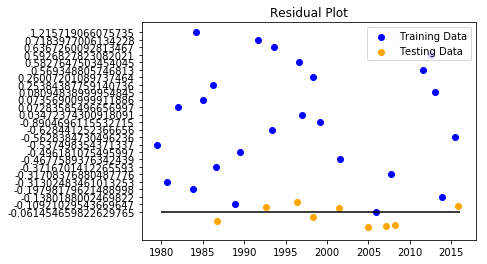

In [144]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION